In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [6]:
data = pd.read_csv('zomatoData.csv')
data_copy = data.copy()

In [7]:
sclaer = MinMaxScaler()
data['AvgCost'] = sclaer.fit_transform(data[['AvgCost']])
data['Rating'] = sclaer.fit_transform(data[['Rating']])

Silhouette Score for 2 clusters is 0.3560155751311646, Davies Bouldin Score for 2 clusters is 1.0635841480212047
Silhouette Score for 3 clusters is 0.361848626008773, Davies Bouldin Score for 3 clusters is 1.0192796200253271
Silhouette Score for 4 clusters is 0.38286641555679285, Davies Bouldin Score for 4 clusters is 0.8603094525787696
Silhouette Score for 5 clusters is 0.3723735620041652, Davies Bouldin Score for 5 clusters is 0.8549261251283744
Silhouette Score for 6 clusters is 0.3898016867979208, Davies Bouldin Score for 6 clusters is 0.8185356316732654
Silhouette Score for 7 clusters is 0.3948201301079602, Davies Bouldin Score for 7 clusters is 0.8125385552712464
Silhouette Score for 8 clusters is 0.34894066371938015, Davies Bouldin Score for 8 clusters is 0.8841374143774108
Silhouette Score for 9 clusters is 0.3759846375096516, Davies Bouldin Score for 9 clusters is 0.8107864453233197
Silhouette Score for 10 clusters is 0.3686784844080281, Davies Bouldin Score for 10 clusters is

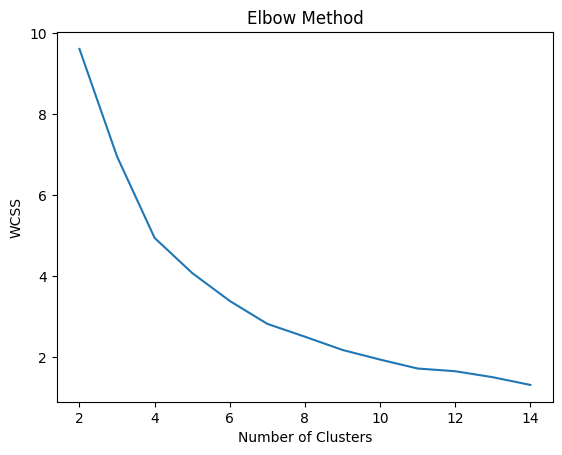

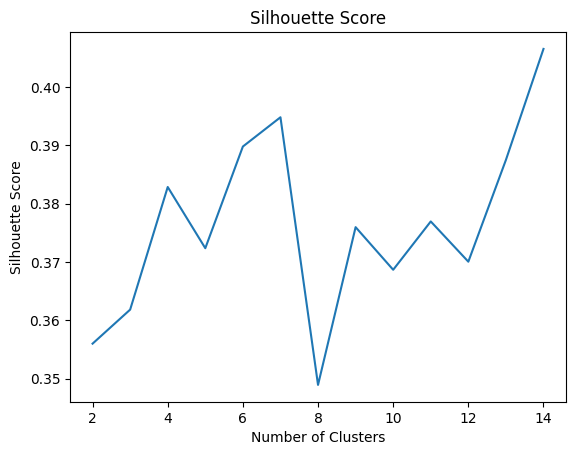

In [9]:
silhouette_sc = []
wcss = []
best_score = 0
best_model = None

cluster_count = range(2, 15)

for i in range(2, 15):
   
    kmeans = KMeans(n_clusters=i,init='random')
    kmeans.fit(data[['Rating', 'AvgCost']])
   
    ss = silhouette_score(data[['Rating', 'AvgCost']],kmeans.labels_)
    db = davies_bouldin_score(data[['Rating', 'AvgCost']],kmeans.labels_)
    print("Silhouette Score for {} clusters is {}".format(i,ss),end=", ")
    print("Davies Bouldin Score for {} clusters is {}".format(i,db))
    
    wcss.append(kmeans.inertia_)
    silhouette_sc.append(ss)
    
    if ss > best_score:
        best_score = ss
        best_model = kmeans
    
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(cluster_count,wcss)

plt.show()

plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.plot(cluster_count,silhouette_sc)

plt.show()


In [10]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandw = estimate_bandwidth(data[['Rating', 'AvgCost']],quantile=0.2)
       
mean_shift = MeanShift(bandwidth=bandw)
mean_shift.fit(data[['Rating', 'AvgCost']])

ss = silhouette_score(data[['Rating', 'AvgCost']],mean_shift.labels_)
db = davies_bouldin_score(data[['Rating', 'AvgCost']],mean_shift.labels_)

print("Silhouette Score for {} bandwidth : {}".format(bandw,ss),end=", ")
print("Davies Bouldin Score for {} bandwidth : {}".format(bandw,db))

Silhouette Score for 0.1964906370073547 bandwidth : 0.3399255336605321, Davies Bouldin Score for 0.1964906370073547 bandwidth : 1.0833564830604332


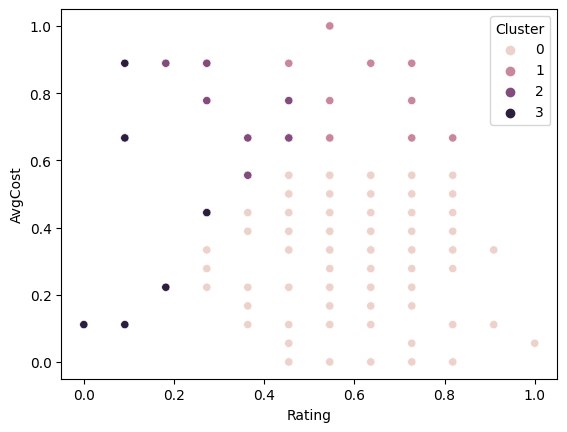

In [12]:
y = mean_shift.labels_
df_km = pd.concat([data[['Rating', 'AvgCost']],pd.DataFrame(y,columns=['Cluster'])],axis=1)

sns.scatterplot(x='Rating',y='AvgCost',hue ='Cluster',data=df_km)
plt.show()